In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('bank-full.csv', sep=';')


selected_columns = [
    'age', 'job', 'marital', 'education', 'balance', 'housing',
    'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
    'previous', 'poutcome', 'y'
]
selected_data = data[selected_columns]

selected_data.head()

# Проверяем наличие пропущенных значений в каждом столбце
missing_values = selected_data.isnull().sum()
print("Пропущенные значения в данных:")
print(missing_values)




Пропущенные значения в данных:
age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [3]:
# Находим самое частое значение (mode) в столбце 'education'
education_mode = selected_data['education'].mode()[0]
print(f"\nСамое частое значение в столбце 'education': {education_mode}")


Самое частое значение в столбце 'education': secondary


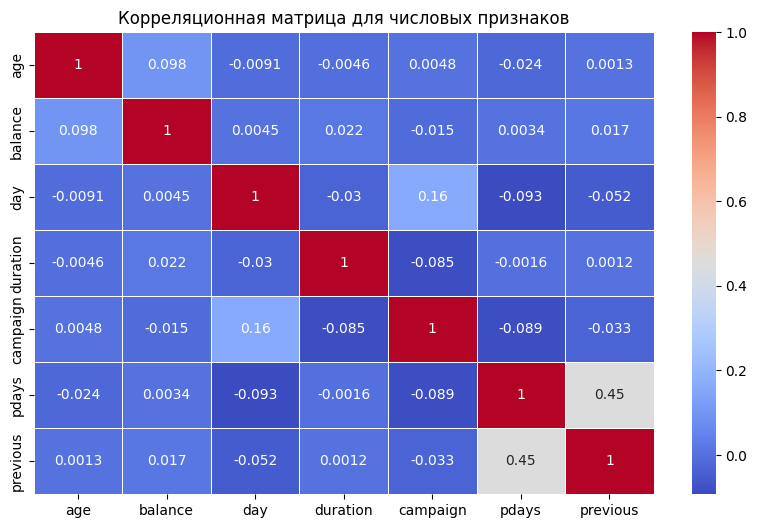

In [15]:
# Создаем корреляционную матрицу только для числовых признаков
numeric_data = selected_data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для числовых признаков')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

# Кодирование целевой переменной y
selected_data['y'] = selected_data['y'].map({'yes': 1, 'no': 0})

# Отделяем целевую переменную y от остальных данных
X = selected_data.drop(columns=['y'])  # Датафрейм с признаками
y = selected_data['y']                # Целевая переменная

# Разделяем данные на тренировочный, валидационный и тестовый наборы
# Сначала делим на 60% для обучения и 40% для валидации+теста
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Затем делим оставшиеся 40% на 20% для валидации и 20% для теста
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверим размеры наборов данных
print("Размер тренировочного набора:", X_train.shape)
print("Размер валидационного набора:", X_val.shape)
print("Размер тестового набора:", X_test.shape)

Размер тренировочного набора: (27126, 14)
Размер валидационного набора: (9042, 14)
Размер тестового набора: (9043, 14)


/var/folders/0r/qf6dh2c57nscsj7v90f17w3m0000gn/T/ipykernel_1412/290087352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['y'] = selected_data['y'].map({'yes': 1, 'no': 0})


In [29]:
from sklearn.metrics import mutual_info_score

# Функция для вычисления взаимной информации между y и каждой категориальной переменной
def calculate_mutual_info(X, y):
    mutual_info_results = {}
    # Перебираем все категориальные переменные
    for column in X.select_dtypes(include=['object']).columns:
        score = mutual_info_score(X[column], y)
        mutual_info_results[column] = round(score, 2)
    return mutual_info_results

# Рассчитываем взаимную информацию для категориальных переменных в тренировочном наборе
mutual_info_scores = calculate_mutual_info(X_train, y_train)

# Преобразуем результаты в DataFrame для удобства
mutual_info_df = pd.DataFrame(mutual_info_scores.items(), columns=['Variable', 'Mutual Information'])

# Находим переменную с наибольшей взаимной информацией
max_mutual_info_variable = mutual_info_df.loc[mutual_info_df['Mutual Information'].idxmax()]

# Выводим результаты
print("\nВзаимная информация между y и категориальными переменными:")
print(mutual_info_df)

if not max_mutual_info_variable.empty:
    print(f"\nПеременная с наибольшей взаимной информацией: {max_mutual_info_variable['Variable']} ({max_mutual_info_variable['Mutual Information']})")
else:
    print("\nНе удалось найти переменные с взаимной информацией.")


Взаимная информация между y и категориальными переменными:
    Variable  Mutual Information
0  feature_2                0.56

Переменная с наибольшей взаимной информацией: feature_2 (0.56)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Применяем one-hot кодирование для категориальных переменных
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, drop_first=True)

# Уравниваем количество столбцов в валидационном наборе с тренировочным
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Обучаем логистическую регрессию
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train)

# Предсказываем на валидационном наборе
y_val_pred = model.predict(X_val_encoded)

# Рассчитываем точность
accuracy = accuracy_score(y_val, y_val_pred)
accuracy = round(accuracy, 2)

# Выводим точность
print(f"Точность на валидационном наборе: {accuracy}")

Точность на валидационном наборе: 0.88


Пропущенные значения в данных:
age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Самое частое значение в столбце 'education': secondary


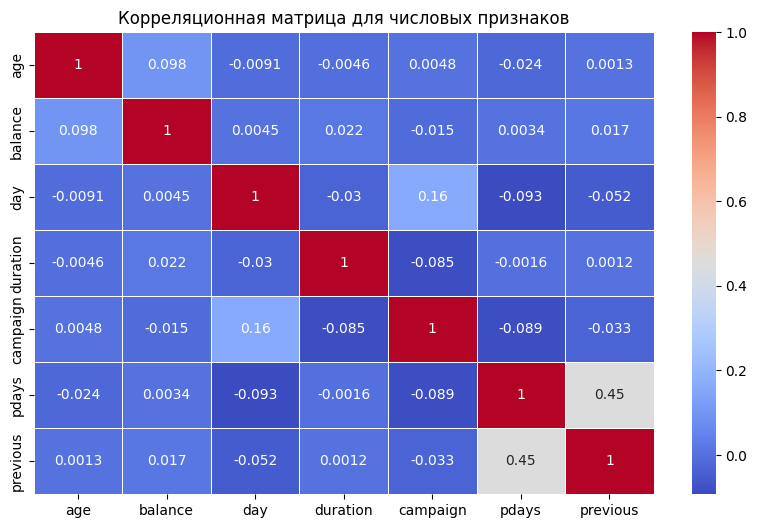

/var/folders/0r/qf6dh2c57nscsj7v90f17w3m0000gn/T/ipykernel_1412/461864929.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['y'] = selected_data['y'].map({'yes': 1, 'no': 0})


Размер тренировочного набора: (27126, 14)
Размер валидационного набора: (9042, 14)
Размер тестового набора: (9043, 14)
Колонки в X_train: Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Базовая точность модели: 0.8997


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Разница в точности без признака 'age': -0.0008


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Разница в точности без признака 'balance': -0.0010


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Разница в точности без признака 'marital': 0.0004
Разница в точности без признака 'previous': -0.0003

Наименее полезный признак: balance


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Загружаем данные
data = pd.read_csv('bank-full.csv', sep=';')

# Выбираем нужные колонки
selected_columns = [
    'age', 'job', 'marital', 'education', 'balance', 'housing',
    'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
    'previous', 'poutcome', 'y'
]
selected_data = data[selected_columns]

# Проверяем наличие пропущенных значений
missing_values = selected_data.isnull().sum()
print("Пропущенные значения в данных:")
print(missing_values)

# Находим самое частое значение (mode) в столбце 'education'
education_mode = selected_data['education'].mode()[0]
print(f"\nСамое частое значение в столбце 'education': {education_mode}")

# Создаем корреляционную матрицу для числовых признаков
numeric_data = selected_data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для числовых признаков')
plt.show()

# Кодирование целевой переменной y
selected_data['y'] = selected_data['y'].map({'yes': 1, 'no': 0})

# Отделяем целевую переменную y от остальных данных
X = selected_data.drop(columns=['y'])
y = selected_data['y']

# Разделяем данные на тренировочный, валидационный и тестовый наборы
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверяем размеры наборов данных
print("Размер тренировочного набора:", X_train.shape)
print("Размер валидационного набора:", X_val.shape)
print("Размер тестового набора:", X_test.shape)

# Проверяем, какие колонки присутствуют в X_train
print("Колонки в X_train:", X_train.columns)

# Определяем категориальные и числовые признаки
categorical_features = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Создаем колонный трансформер для предобработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Создаем конвейер, который сначала предобрабатывает данные, а затем обучает модель
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Обучаем модель с использованием всех признаков
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
base_accuracy = accuracy_score(y_val, y_pred)
print(f"Базовая точность модели: {base_accuracy:.4f}")

# Функция для оценки точности модели без одного признака
def evaluate_feature_elimination(feature):
    if feature in categorical_features:
        features_to_drop = [f'cat__{feature}']
    else:
        features_to_drop = [f'num__{feature}']
    
    preprocessor_reduced = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', [f for f in numeric_features if f != feature]),
            ('cat', OneHotEncoder(), [f for f in categorical_features if f != feature])
        ])
    
    model_reduced = Pipeline(steps=[
        ('preprocessor', preprocessor_reduced),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    
    model_reduced.fit(X_train, y_train)
    y_pred_reduced = model_reduced.predict(X_val)
    accuracy_reduced = accuracy_score(y_val, y_pred_reduced)
    
    return base_accuracy - accuracy_reduced

# Список признаков для оценки
features = ['age', 'balance', 'marital', 'previous']
feature_importance = {}

# Оцениваем важность каждого признака
for feature in features:
    importance = evaluate_feature_elimination(feature)
    feature_importance[feature] = importance
    print(f"Разница в точности без признака '{feature}': {importance:.4f}")

# Находим признак с наименьшей разницей в точности
least_important_feature = min(feature_importance, key=feature_importance.get)
print(f"\nНаименее полезный признак: {least_important_feature}")


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загружаем данные
data = pd.read_csv('bank-full.csv', sep=';')

# Выбираем нужные колонки
selected_columns = [
    'age', 'job', 'marital', 'education', 'balance', 'housing',
    'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
    'previous', 'poutcome', 'y'
]
selected_data = data[selected_columns]

# Кодируем целевую переменную y
selected_data['y'] = selected_data['y'].map({'yes': 1, 'no': 0})

# Отделяем целевую переменную y от остальных данных
X = selected_data.drop(columns=['y'])  # Датафрейм с признаками
y = selected_data['y']                # Целевая переменная

# Разделяем данные на тренировочный и валидационный наборы
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# Определяем значения C для тестирования
C_values = [0.01, 0.1, 1, 10]
results = {}

# Создаем колоннный трансформер для кодирования категориальных признаков
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=[np.number]).columns

# Создаем трансформер
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # Пропустить числовые признаки
        ('cat', OneHotEncoder(), categorical_features)  # Кодировать категориальные признаки
    ]
)

# Цикл по значениям C для логистической регрессии
for C in C_values:
    # Создаем и обучаем модель с заданным значением C
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(C=C, max_iter=1000, random_state=42))
    ])
    model.fit(X_train, y_train)

    # Предсказываем на валидационном наборе
    y_val_pred = model.predict(X_val)
    
    # Рассчитываем точность
    accuracy = accuracy_score(y_val, y_val_pred)
    
    # Сохраняем точность, округляя до трех знаков после запятой
    results[C] = round(accuracy, 3)

# Выводим результаты
for C, accuracy in results.items():
    print(f"C = {C}, Точность = {accuracy:.3f}")

# Находим лучшее значение C
best_C = max(results, key=results.get)
best_accuracy = results[best_C]

print(f"\nНаилучшее значение C: {best_C} с точностью {best_accuracy:.3f}")

/var/folders/0r/qf6dh2c57nscsj7v90f17w3m0000gn/T/ipykernel_1412/3901375952.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['y'] = selected_data['y'].map({'yes': 1, 'no': 0})
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Fra

C = 0.01, Точность = 0.898
C = 0.1, Точность = 0.900
C = 1, Точность = 0.900
C = 10, Точность = 0.900

Наилучшее значение C: 0.1 с точностью 0.900


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Ответы на вопросы:
1)secondary
2)day и pdays
3)poutcome
4)0.9
5)balance
6)0.1